# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [135]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report


In [136]:
# Read csv
df_raw = pd.read_csv("diamonds.csv")
df_raw

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [137]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
df_raw.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [138]:
df_raw.describe(include = "O").T 

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065
price,53940,5,Very Low,34663


In [139]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
index      53940 non-null int64
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
price      53940 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [140]:
df_raw.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [141]:
df_raw.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Exploratory Data Analysis

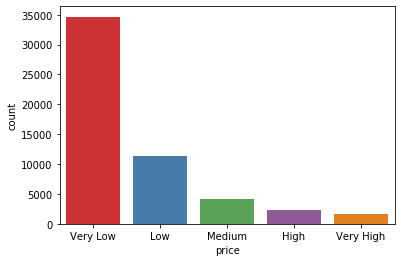

In [142]:
# Our label Distribution (countplot)
import seaborn as sns
ax = sns.countplot(x="price", data=df_raw, palette="Set1")

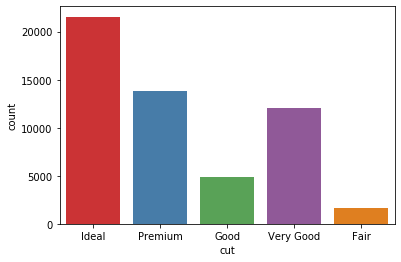

In [143]:
ax = sns.countplot(x="cut", data=df_raw, palette="Set1")

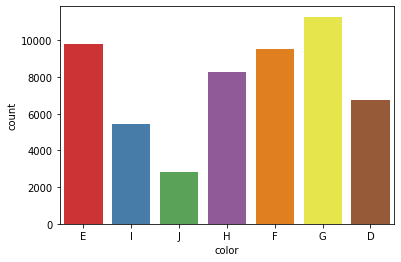

In [144]:
ax = sns.countplot(x="color", data=df_raw, palette="Set1")

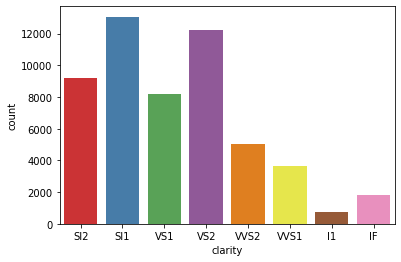

In [145]:
ax = sns.countplot(x="clarity", data=df_raw, palette="Set1")

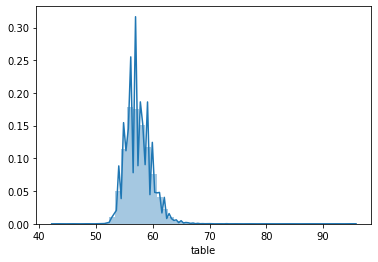

In [146]:
ax = sns.distplot(df_raw['table'])
plt.show()

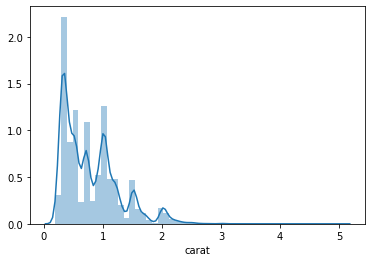

In [147]:
ax = sns.distplot(df_raw['carat'])
plt.show()

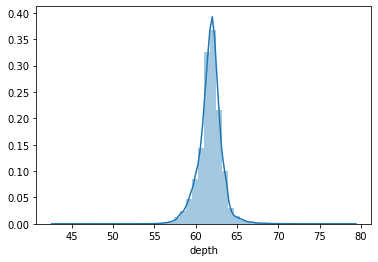

In [148]:
ax = sns.distplot(df_raw['depth'])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [149]:
df = df_raw.drop(["index"],axis=1)
df.duplicated().sum()

342

In [150]:
df = df.drop_duplicates().reset_index(drop = True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...
53593,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53594,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53595,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53596,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


          carat     depth     table         x         y         z
carat  1.000000  0.028400  0.180795  0.975362  0.951795  0.953437
depth  0.028400  1.000000 -0.297230 -0.024843 -0.028921  0.095258
table  0.180795 -0.297230  1.000000  0.194475  0.182893  0.149947
x      0.975362 -0.024843  0.194475  1.000000  0.974491  0.970590
y      0.951795 -0.028921  0.182893  0.974491  1.000000  0.951672
z      0.953437  0.095258  0.149947  0.970590  0.951672  1.000000


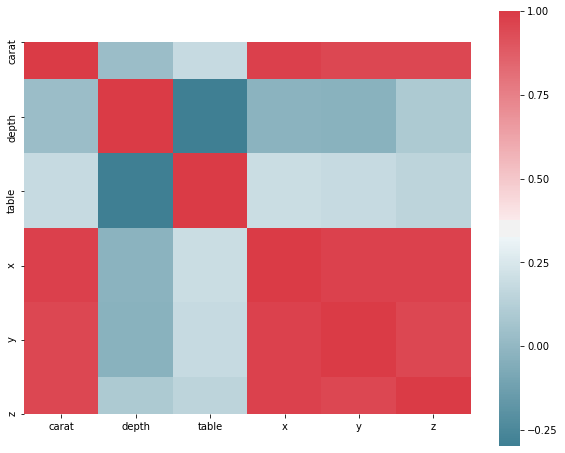

In [151]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
print(corr)
import seaborn
seaborn.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
                cmap=seaborn.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
plt.show()

In [152]:
#We need the generate new features with combining x y z features.
#Because, that 3 features are strongly correlated with each other and multiplication of this variables gives .

df["volume"] = df["x"]*df["y"]*df["z"]
df.drop(['x','y','z'],axis=1,inplace=True)
df

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,Very Low,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,Very Low,34.505856
2,0.23,Good,E,VS1,56.9,65.0,Very Low,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,Very Low,46.724580
4,0.31,Good,J,SI2,63.3,58.0,Very Low,51.917250
...,...,...,...,...,...,...,...,...
53593,0.72,Ideal,D,SI1,60.8,57.0,Very Low,115.920000
53594,0.72,Good,D,SI1,63.1,55.0,Very Low,118.110175
53595,0.70,Very Good,D,SI1,62.8,60.0,Very Low,114.449728
53596,0.86,Premium,H,SI2,61.0,58.0,Very Low,140.766120


In [154]:
df = df.drop(df[df["volume"]==0].index)

In [157]:
df.shape

(53579, 8)

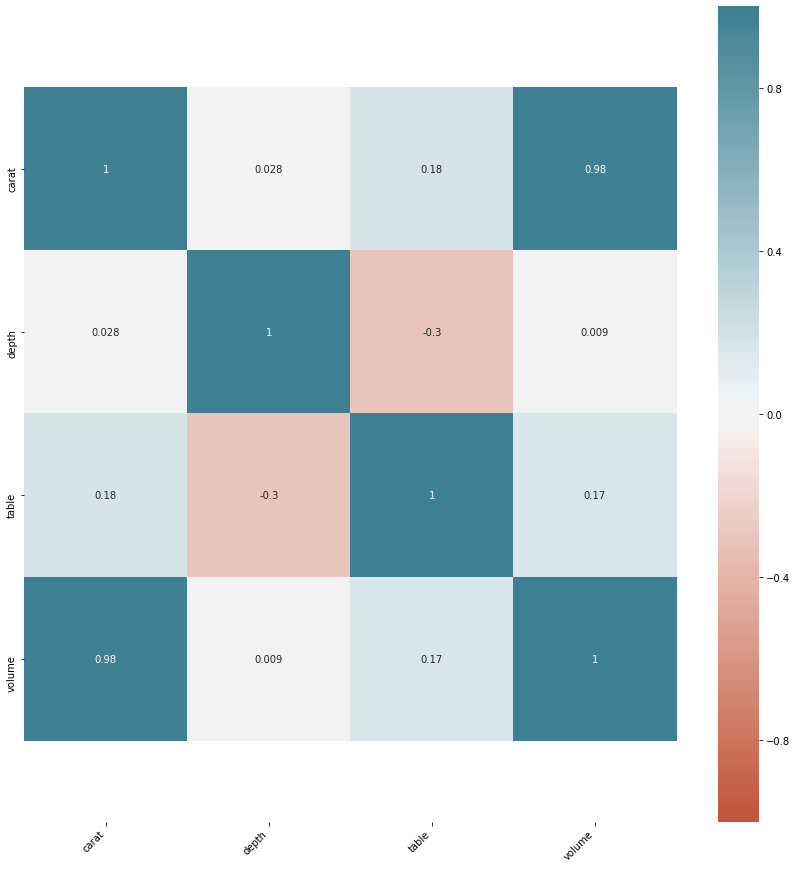

In [158]:
corr = df.corr()

plt.figure(figsize=(15, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [159]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["cut"] = label_encoder.fit_transform(df["cut"])
df["clarity"] = label_encoder.fit_transform(df["clarity"]) 
df["color"] = label_encoder.fit_transform(df["color"]) 
df["price"] = label_encoder.fit_transform(df["price"]) 
df

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,4,38.202030
1,0.21,3,1,2,59.8,61.0,4,34.505856
2,0.23,1,1,4,56.9,65.0,4,38.076885
3,0.29,3,5,5,62.4,58.0,4,46.724580
4,0.31,1,6,3,63.3,58.0,4,51.917250
...,...,...,...,...,...,...,...,...
53593,0.72,2,0,2,60.8,57.0,4,115.920000
53594,0.72,1,0,2,63.1,55.0,4,118.110175
53595,0.70,4,0,2,62.8,60.0,4,114.449728
53596,0.86,3,4,3,61.0,58.0,4,140.766120


In [160]:
df.describe()

,carat,cut,color,clarity,depth,table,price,volume
count,53579.000000,53579.000000,53579.000000,53579.000000,53579.000000,53579.000000,53579.000000,53579.000000
mean,0.797210,2.555274,2.592527,3.836466,61.748551,57.455934,3.020922,129.821621
std,0.472827,1.027879,1.701106,1.724432,1.429002,2.231979,1.392063,78.090102
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,0.000000,31.707984
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,1.000000,65.220078
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,4.000000,114.846336
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,4.000000,170.790840
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,4.000000,3840.598060


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [161]:
#Splitting dataset

df = df[["carat", "cut", "color", "clarity", "depth","table","volume","price"]]
X, y = df.iloc[: , :-1], df.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)
X

,carat,cut,color,clarity,depth,table,volume
0,0.23,2,1,3,61.5,55.0,38.202030
1,0.21,3,1,2,59.8,61.0,34.505856
2,0.23,1,1,4,56.9,65.0,38.076885
3,0.29,3,5,5,62.4,58.0,46.724580
4,0.31,1,6,3,63.3,58.0,51.917250
...,...,...,...,...,...,...,...
53593,0.72,2,0,2,60.8,57.0,115.920000
53594,0.72,1,0,2,63.1,55.0,118.110175
53595,0.70,4,0,2,62.8,60.0,114.449728
53596,0.86,3,4,3,61.0,58.0,140.766120


In [162]:
#DECISION TREE IMPLEMENTATION
decisionTree = DecisionTreeClassifier(max_depth=10, random_state=42)
decisionTree.fit(X_train,y_train)
print("Accuracy of train:",decisionTree.score(X_train,y_train))
print("Accuracy of test:",decisionTree.score(X_test,y_test))

Accuracy of train: 0.9429676043194241
Accuracy of test: 0.9233544855045415


In [163]:
pred = decisionTree.predict(X_test)
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.8130003703371156
Recall = 0.8280434365436236
Accuracy = 0.9233544855045415
F1 Score = 0.8178300200094313


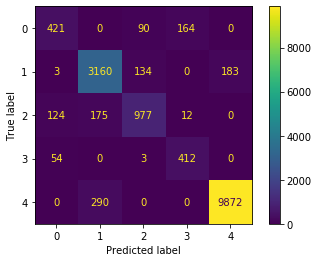

In [164]:
plot_confusion_matrix(decisionTree, X_test, y_test)
plt.show()

In [165]:
#implementation of XGBOOST 

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1],
    'n_estimators': [10,100,200,210,400]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = RandomizedSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:34:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'n_estimators': 210, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 1}
Mean of the cv scores is 0.930116
Train Score 0.973150
Test Score 0.933060
Seconds used for refitting the best model on the train dataset: 10.020090


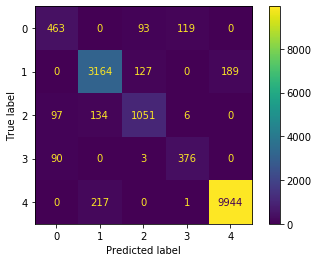

In [166]:
pred = clf.predict(X_test)

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [167]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))
print("\nClassification report for Naive Bayes: \n", classification_report(y_test, pred))

Precision = 0.8335525496149014
Recall = 0.8382736807976133
Accuracy = 0.9330595993529924
F1 Score = 0.8356743982773975

Classification report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       675
           1       0.90      0.91      0.90      3480
           2       0.82      0.82      0.82      1288
           3       0.75      0.80      0.77       469
           4       0.98      0.98      0.98     10162

    accuracy                           0.93     16074
   macro avg       0.83      0.84      0.84     16074
weighted avg       0.93      0.93      0.93     16074



In [168]:
#Implemantation of Naive Bayes 
from sklearn.naive_bayes import GaussianNB

naiveBayesModel = GaussianNB()
naiveBayesModel.fit(X_train, y_train)
y_predict =naiveBayesModel.predict(X_test)
bayes_accuracy=accuracy_score(y_test, y_predict)

print("\nAccuracy  for Naive Bayes:\n",bayes_accuracy )
print("Precision = {}".format(precision_score(y_test, y_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict)))
print("F1 Score = {}".format(f1_score(y_test, y_predict,average='macro')))
print("\nClassification report for Naive Bayes: \n", classification_report(y_test, y_predict))


Accuracy  for Naive Bayes:
 0.8347642155032973
Precision = 0.5977798250553674
Recall = 0.6160116103015073
Accuracy = 0.8347642155032973
F1 Score = 0.5918800519125776

Classification report for Naive Bayes: 
               precision    recall  f1-score   support

           0       0.33      0.13      0.18       675
           1       0.68      0.90      0.78      3480
           2       0.49      0.46      0.47      1288
           3       0.50      0.68      0.58       469
           4       0.99      0.92      0.95     10162

    accuracy                           0.83     16074
   macro avg       0.60      0.62      0.59     16074
weighted avg       0.84      0.83      0.83     16074



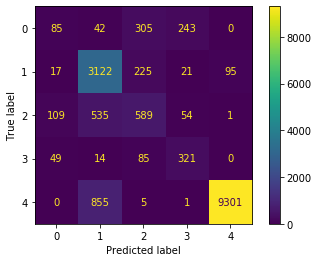

In [169]:
prediction = naiveBayesModel.predict(X_test)

plot_confusion_matrix(naiveBayesModel, X_test, y_test)
plt.show()

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

## RESULT 

- Best performing model is XGBoost. Because it gives better result in terms of accuracy, precision, recall and F1 score for test data. 
- Presence of outlier values in the training data often reduces the accuracy of a model.  I can delete the observations, perform transformation or binning for this issue.
- Results can be improved by performing a more detailed preprocessing.